# **torchxai.cka**

In [1]:
# import sys
# sys.path.append("../")
import torchxai as tx

import torch
from torchvision import models, datasets, transforms
import numpy as np

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## **datasets**

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.CIFAR10(root='../data', train=True, download=True, transform=transform)

# take subset for testing 
train_indices = [i for i in range(100)]
dataset = torch.utils.data.Subset(dataset, train_indices)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=0)

Files already downloaded and verified


## **models**

In [3]:
device = torch.device("cpu")

model = models.resnet18(pretrained=True)
model = model.to(device)

c:\Users\jimmy\miniconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\jimmy\miniconda3\envs\pt\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## **torchxai.utils.extract_features**

In [4]:
features = tx.utils.extract_features(model, dataloader, device, exclude_layers=None)
features.keys()

dict_keys(['', 'conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1.0', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.relu', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.1', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.relu', 'layer1.1.conv2', 'layer1.1.bn2', 'layer2', 'layer2.0', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.relu', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.1', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.relu', 'layer2.1.conv2', 'layer2.1.bn2', 'layer3', 'layer3.0', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.relu', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample', 'layer3.0.downsample.0', 'layer3.0.downsample.1', 'layer3.1', 'layer3.1.conv1', 'layer3.1.bn1', 'layer3.1.relu', 'layer3.1.conv2', 'layer3.1.bn2', 'layer4', 'layer4.0', 'layer4.0.conv1', 'layer4.0.bn1', 'layer4.0.relu', 'layer4.0.conv2', 'layer4.0.bn2', 'layer4.0.downsample', 'layer4.0.downsample.0', 'layer4.0.downsample.1', 'layer4.1', 

## **CKA**

In [5]:
# intra-model CKA analysis
cka_matrix = tx.cka.CKA_matrix(features, features)
cka_matrix.shape
cka_matrix

68it [00:08,  7.66it/s]


array([[1.72073178e-06, 2.38750227e-06, 1.05641353e-05, ...,
        7.41607516e-06, 1.67524301e-05, 1.72073178e-06],
       [2.38750227e-06, 4.80024134e-06, 1.75989565e-05, ...,
        1.09648626e-05, 2.39164099e-05, 2.38750227e-06],
       [1.05641353e-05, 1.75989565e-05, 7.52440198e-05, ...,
        4.84424519e-05, 1.04995543e-04, 1.05641353e-05],
       ...,
       [7.41607516e-06, 1.09648626e-05, 4.84424519e-05, ...,
        3.52277374e-05, 7.24973097e-05, 7.41607516e-06],
       [1.67524301e-05, 2.39164099e-05, 1.04995543e-04, ...,
        7.24973097e-05, 1.76611640e-04, 1.67524301e-05],
       [1.72073178e-06, 2.38750227e-06, 1.05641353e-05, ...,
        7.41607516e-06, 1.67524301e-05, 1.72073178e-06]])

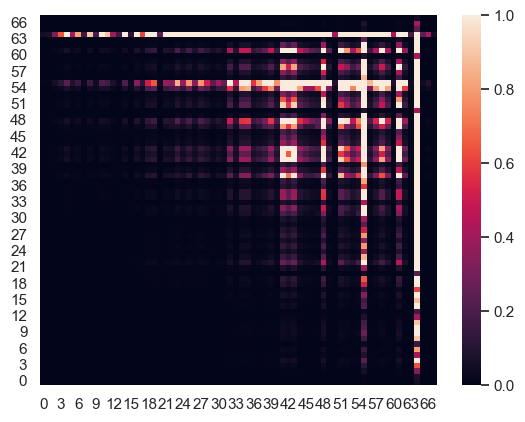

In [6]:
tx.cka.visualize(cka_matrix)